<a href="https://colab.research.google.com/github/GreisonMontenari/Cartorioebac/blob/main/Profissao_Analista_de_dados_M15_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [15]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 0, 'Preço (USD)')

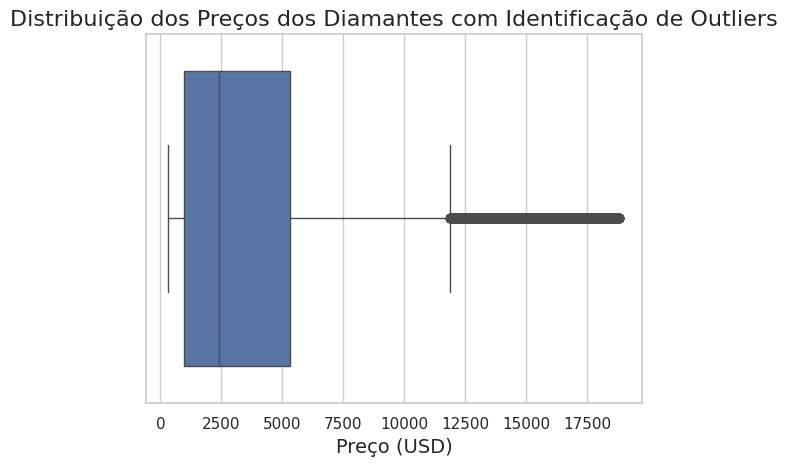

In [16]:
# gráfico do exercício 1

sns.set(style="whitegrid")
# plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='price', data=data)

ax.set_title('Distribuição dos Preços dos Diamantes com Identificação de Outliers', fontsize=16)
ax.set_xlabel('Preço (USD)', fontsize=14)

Insight do gráfico 1:

Os preços do diamentes se concentra na faixa entre 800 a 5500
A faixa de preços dentro do IQR mostra uma variabilidade significativa, indicando que, mesmo entre os diamantes considerados "normais", há uma diversidade de preços.
Esses diamantes com preço maior podem estar destinados a compradores específicos que procuram as melhores qualidades possíveis, independentemente do preço.

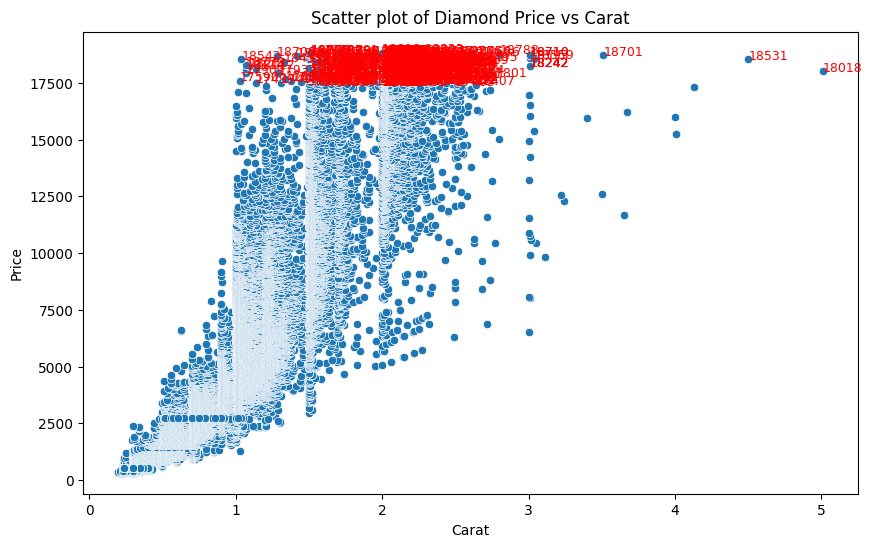

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados de diamantes
data = sns.load_dataset("diamonds")

# Plotar um gráfico de dispersão de preço versus quilates
plt.figure(figsize=(10,6))
sns.scatterplot(x='carat', y='price', data=data)

# Identificar os outliers
outliers = data[data['price'] > data['price'].quantile(0.99)]
for i in range(len(outliers)):
    plt.text(outliers.iloc[i]['carat'], outliers.iloc[i]['price'], outliers.iloc[i]['price'], fontsize=9, color='red')

# Definir rótulos e título
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Scatter plot of Diamond Price vs Carat')

# Mostrar o gráfico
plt.show()

**Insight do gráfico 1**: ...

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [5]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 1.03, 'Correlação entre Preço e Peso (Carat) dos Diamantes Agrupados por Transparência (Clarity)')

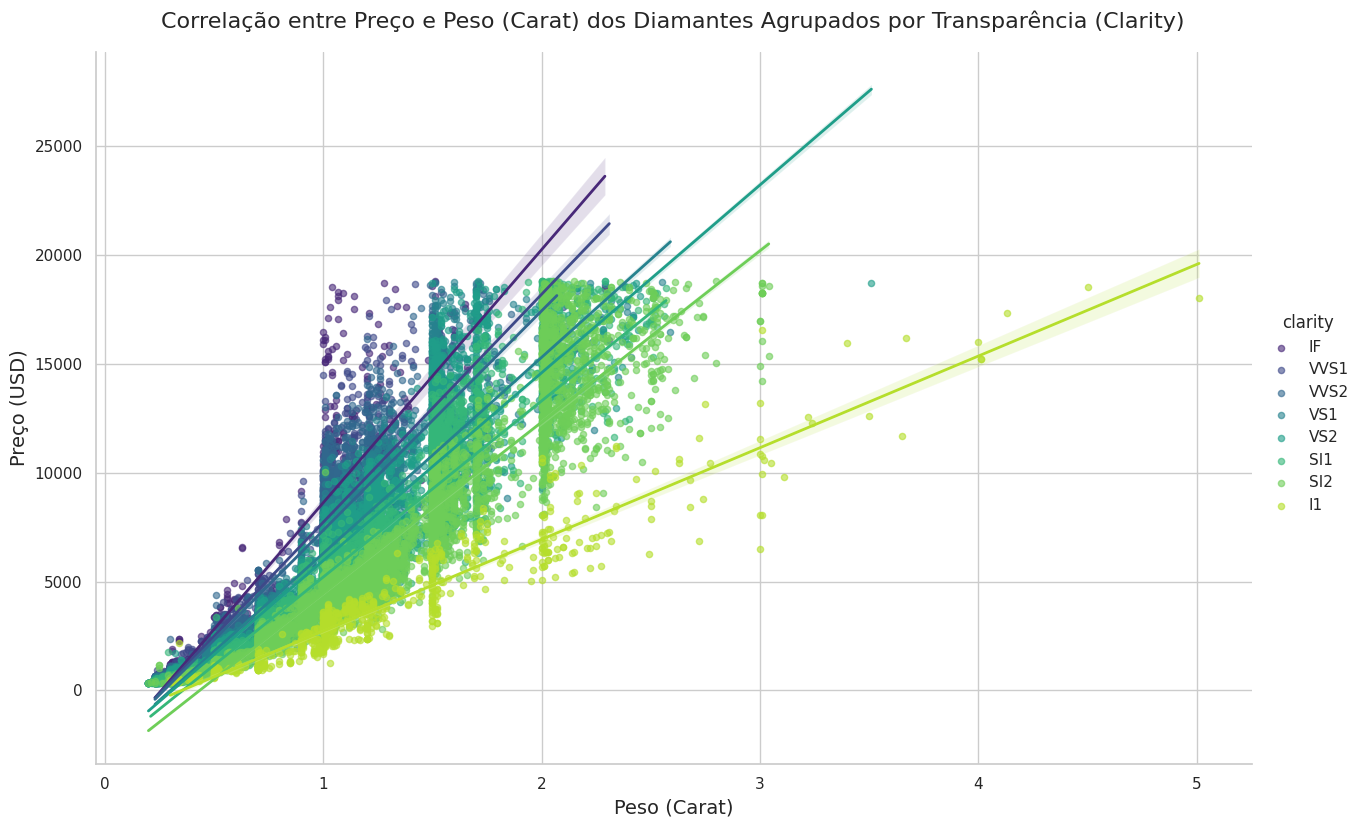

In [17]:
# gráfico do exercício 2

sns.set(style="whitegrid")
g = sns.lmplot(x='carat', y='price', hue='clarity', data=data, aspect=1.6, height=8, markers='o', palette='viridis', scatter_kws={'s': 20, 'alpha': 0.6}, line_kws={'linewidth': 2})

g.set_axis_labels('Peso (Carat)', 'Preço (USD)', fontsize=14)
g.fig.suptitle('Correlação entre Preço e Peso (Carat) dos Diamantes Agrupados por Transparência (Clarity)', fontsize=16, y=1.03)



Insight do gráfico 2:

Diamantes com melhor transparência (clarity) tendem a ter preços mais altos para o mesmo peso.
Os dados estão dispersos ao longo da linha de regressão, indicando variação nos preços que não é explicada apenas pelo peso e pela transparência
Há uma relação positiva clara entre o peso (carat) do diamante e seu preço.

In [8]:
# gráfico do exercício 2

diamonds = ...

**Insight do gráfico 2**: ...

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [18]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


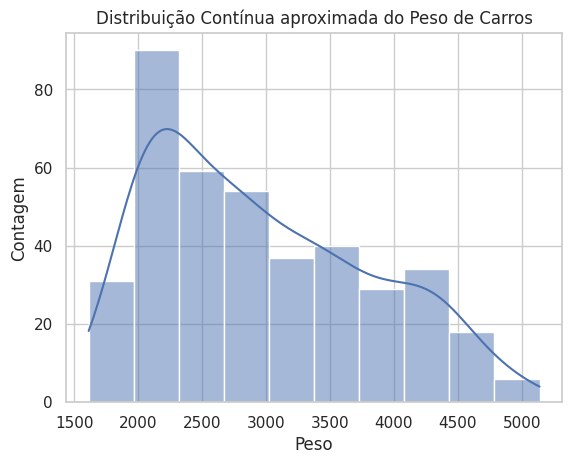

In [19]:
# gráfico do exercício 3

with sns.axes_style('whitegrid'):

  grafico_cars = sns.histplot(data=data, x="weight", kde=True)
  grafico_cars.set(title='Distribuição Contínua aproximada do Peso de Carros', xlabel='Peso', ylabel='Contagem');


Insight do gráfico 3:

Observamos que o peso mais comun entre os carros é de 2300
Notamos que exite uma quantidade pequena de carros com o peso de 5000

**Insight do gráfico 3**: ...

---